# Elliot Galvis
### Book Challenge Data Description / Visualization / Stats Overview

#### Imports Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Word cloud visualization
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#### Imports the dataset from my CSV file

In [2]:
corpus_df = pd.read_csv("Corpus-Titles-for-Data-Vis.csv")

### Shows the basic layout of my corpus taken from the total challenge dataset, including the 200 titles, 101 features (including 32 dichotomous challenge tag labels), and their datatypes

In [3]:
corpus_df.describe()

,# Cases since 2010,Booklooks/RatedBooks Rating,Publication Year,Abortion,Anti-Family,Body Description or Function,Death,Defies Authority,Drugs,EDI Content,...,Count SD,Count TN,Count TX,Count UT,Count VA,Count VT,Count WA,Count WI,Count WV,Count WY
count,200.000000,32.000000,139.000000,200.000000,200.000000,200.0,200.0,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,19.300000,3.218750,1987.258993,0.015000,0.075000,0.0,0.0,0.020000,0.110000,0.040000,...,0.065000,0.330000,2.730000,0.495000,0.670000,0.015000,0.335000,0.515000,0.050000,0.055000
std,43.637382,0.906406,25.230054,0.121857,0.264052,0.0,0.0,0.140351,0.313675,0.196451,...,0.401974,0.967357,5.836732,1.578745,1.644574,0.157796,0.869803,1.410576,0.240393,0.304035
min,1.000000,1.000000,1916.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1975.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1993.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,4.000000,2004.500000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,249.000000,5.000000,2021.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,...,4.000000,7.000000,31.000000,10.000000,8.000000,2.000000,5.000000,11.000000,2.000000,3.000000


### Here, I provide the summary statistics for number of challenges of title during this fourteen-year period for the corpus of 200 texts

In [4]:
corpus_df["# Cases since 2010"].describe()

count    200.000000
mean      19.300000
std       43.637382
min        1.000000
25%        1.000000
50%        2.000000
75%        9.000000
max      249.000000
Name: # Cases since 2010, dtype: float64

### Note: As we can see, the median and minimum number of times individual titles are challenged from 2010-2023 are only 1 time, while the mean for the corpus is 19.3 times and the max is 249 times

### The below shows the first 10 titles in the dataframe to give an overview of the data structure and show the data for the 10 most challenged books during this period

In [5]:
corpus_df.drop(['ISBN'], axis=1).sort_values(by="# Cases since 2010", ascending=False).head(10)

,Full Title,Author(s),# Cases since 2010,Booklooks/RatedBooks Rating,Type of Material,Fiction/NonFiction,Age Group,Publisher,Publication Year,OCLC Tag,...,Count SD,Count TN,Count TX,Count UT,Count VA,Count VT,Count WA,Count WI,Count WV,Count WY
198,All Boys Aren't Blue: A Memoir-Manifesto,George M. Johnson,249,4.0,Book,Non-Fiction,Young Adult,Penguin Books,2021.0,BIPOC/LGBTQIA+,...,1,3,30,4,7,0,5,6,0,0
191,The Bluest Eye,Toni Morrison,239,4.0,Book,Fiction,Adult,Plume Book,1994.0,BIPOC Fiction,...,0,4,28,10,8,0,3,3,1,0
194,The Perks of Being a Wallflower,Stephen Chbosky,190,4.0,Book,Fiction,Young Adult,Pocket Books,1999.0,LGBTQIA+,...,4,6,25,8,7,0,1,5,0,2
140,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,181,2.0,Book,Fiction,Young Adult,"Little, Brown",2007.0,BIPOC Fiction,...,1,2,13,9,4,0,2,6,1,0
180,Looking for Alaska,John Green,165,3.0,Book,Fiction,Young Adult,Dutton Books,2005.0,NaN,...,0,7,14,6,7,0,1,6,0,1
184,This Book is Gay,Juno Dawson,161,4.0,Book,Non-Fiction,Young Adult,Sourcebooks,2015.0,LGBTQIA+,...,2,3,11,1,4,0,2,6,0,3
101,Me and Earl and the Dying Girl,Jesse Andrews,138,3.0,Book,Fiction,Young Adult,Amulet Books,2012.0,NaN,...,0,1,25,5,7,0,1,3,0,1
192,The Hate U Give,Angie Thomas,131,3.0,Book,Fiction,Young Adult,HarperCollins,2017.0,BIPOC Fiction,...,0,3,8,4,2,0,2,4,0,0
182,Out of Darkness,Ashley Hope Pérez,130,3.0,Book,Fiction,Young Adult,Lerner Publishing Group,2015.0,BIPOC Fiction,...,0,1,31,7,6,0,2,2,0,0
197,I Know Why the Caged Bird Sings,Maya Angelou,127,3.0,Book,Non-Fiction,Adult,Random House,1969.0,BIPOC Biography,...,0,3,18,0,2,0,4,2,0,0


#### Checks for missing values and the percentage of each feature with null values. Displays those  features in ranked order of what percentage of examples' values for those features are null.

In [6]:
total = corpus_df.isnull().sum().sort_values(ascending=False)
percent_1 = corpus_df.isnull().sum()/corpus_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Booklooks/RatedBooks Rating,168,84.0
OCLC Tag,161,80.5
Subject(s),138,69.0
ISBN,115,57.5
Age Group,104,52.0
Fiction/NonFiction,94,47.0
Publisher,89,44.5
Description,88,44.0
Publication Year,61,30.5
Specific complaint,32,16.0


## The below barcharts help give a better understanding of the distribution of the titles dataset according to categorical features

[Text(0, 0, '97'), Text(0, 0, '9')]

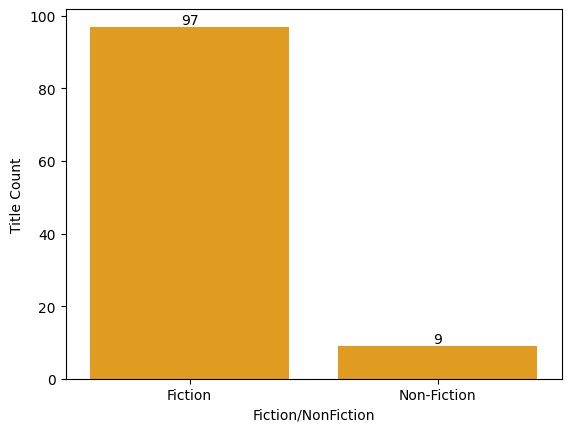

In [7]:
df = corpus_df

categories = [df['Fiction/NonFiction'] == "Fiction", df['Fiction/NonFiction'] == "Non-Fiction"]
counts = [df["Fiction/NonFiction"].value_counts()["Fiction"], df["Fiction/NonFiction"].value_counts()["Non-Fiction"]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Fiction/NonFiction', y='Title Count', color="orange", data=corpus_df)
plot.bar_label(plot.containers[0])

[Text(0, 0, '56'), Text(0, 0, '36'), Text(0, 0, '4')]

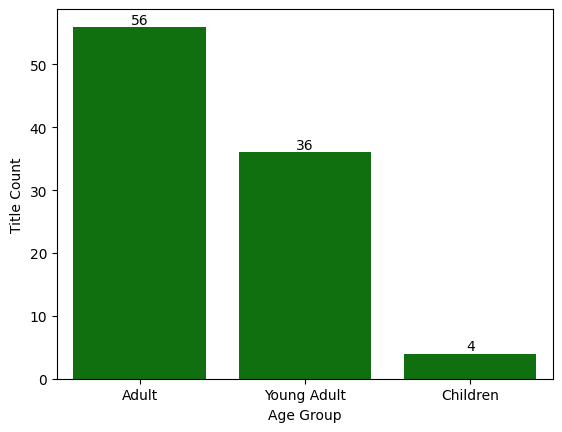

In [8]:
df = corpus_df

categories = [df['Age Group'] == "Young Adult", df['Age Group'] == "Adult", df['Age Group'] == "Children"]
counts = [df["Age Group"].value_counts()["Young Adult"], df["Age Group"].value_counts()["Adult"], df["Age Group"].value_counts()["Children"]]

df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Age Group', y='Title Count', color='green', data=corpus_df)
plot.bar_label(plot.containers[0])

### The below code provides a pie chart of OCLC tags to show the distributions of labeled titles across each tag

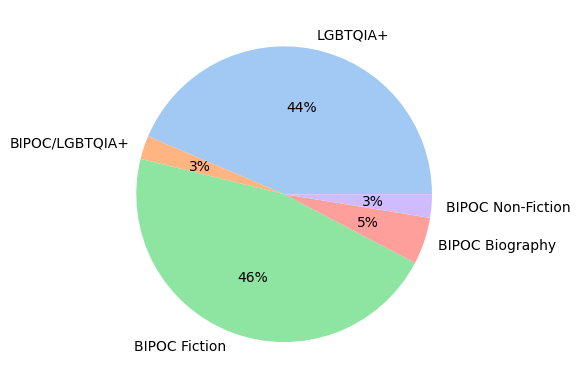

In [9]:
df = corpus_df

categories = ["LGBTQIA+", "BIPOC/LGBTQIA+", "BIPOC Fiction", "BIPOC Biography", "BIPOC Non-Fiction"]
counts = [df["OCLC Tag"].value_counts()["LGBTQIA+"], df["OCLC Tag"].value_counts()["BIPOC/LGBTQIA+"], df["OCLC Tag"].value_counts()["BIPOC Fiction"], df["OCLC Tag"].value_counts()["BIPOC Biography"], df["OCLC Tag"].value_counts()["BIPOC Non-Fiction"]]

palette_color = sns.color_palette('pastel') 

plt.pie(counts, labels=categories, colors=palette_color, autopct='%.0f%%') 
plt.savefig('3-4b.png', bbox_inches='tight')
plt.show()

### When we check our assignment of OCLC tag numerals above and consult this visualization, we can see that titles labeled BIPOC Fiction and LGBTQIA+ are targeted by far the most frequently compared to the other tagged titles. This makes sense given the curation of the corpus from the HBW Corpus, 20th Century Novel, and highly-challenged LGBTQ+ titles

### I include the below heatmap of the  Challenge Tag features to show that none of the tags can fully substitute for another. I.e. a title being challenged on the basis of being "LGBTQIA" does not mean that it will be challenged on the basis of being "Sexually Explicit" (or any other tag), and vice versa. 

### What we can see is that I can probably eliminate my created "homosexuality" feature (derived from specific complaints) as that likely has been incorporated into the "LGBTQIA" tag. I can also drop "Body Description or Function," "Death," "Grammar," "Humor," and "Supernatural" as they aren't applied to any of the corpus titles

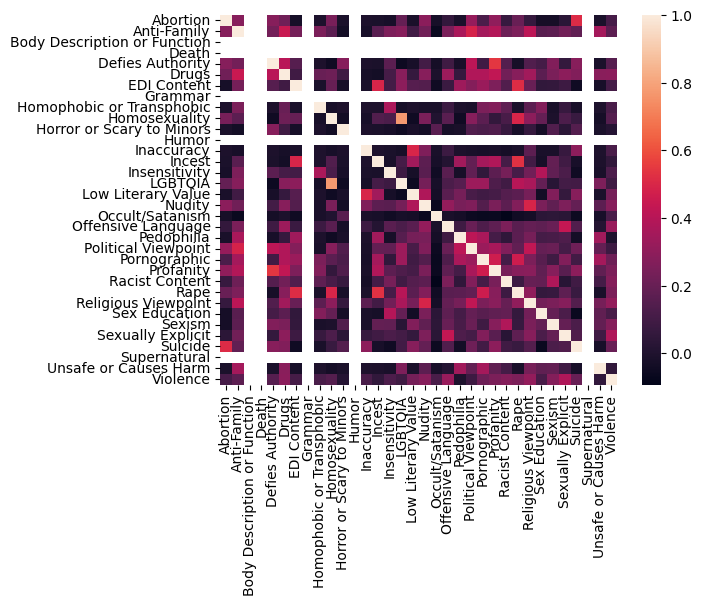

In [10]:
 tags_df = corpus_df[['Abortion',
       'Anti-Family', 'Body Description or Function',
       'Death', 'Defies Authority', 'Drugs',
       'EDI Content', 'Grammar', 'Homophobic or Transphobic',
       'Homosexuality', 'Horror or Scary to Minors',
       'Humor', 'Inaccuracy', 'Incest', 'Insensitivity',
       'LGBTQIA', 'Low Literary Value', 'Nudity',
       'Occult/Satanism', 'Offensive Language', 'Pedophilia',
       'Political Viewpoint', 'Pornographic', 'Profanity', 'Racist Content',
       'Rape', 'Religious Viewpoint', 'Sex Education',
       'Sexism', 'Sexually Explicit', 'Suicide',
       'Supernatural', 'Unsafe or Causes Harm', 'Violence']]

sns.heatmap(tags_df.corr(), yticklabels=True, xticklabels=True)
plt.show()

[Text(0, 0, '173'), Text(0, 0, '27')]

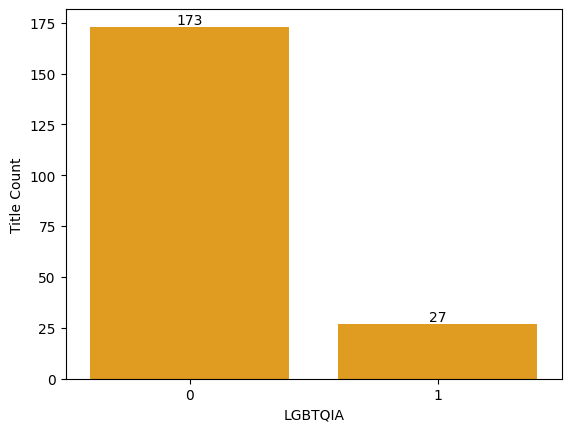

In [11]:
df = corpus_df

categories = [df['LGBTQIA'] == 0, df['LGBTQIA'] == 1]
counts = [df["LGBTQIA"].value_counts()[0], df["LGBTQIA"].value_counts()[1]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='LGBTQIA', y='Title Count', color="orange", data=corpus_df)
plot.bar_label(plot.containers[0])

[Text(0, 0, '92'), Text(0, 0, '108')]

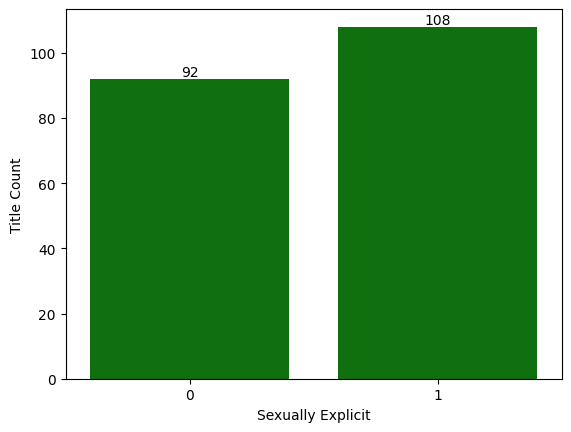

In [12]:
df = corpus_df

categories = [df['Sexually Explicit'] == 0, df['Sexually Explicit'] == 1]
counts = [df["Sexually Explicit"].value_counts()[0], df["Sexually Explicit"].value_counts()[1]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Sexually Explicit', y='Title Count', color="green", data=corpus_df)
plot.bar_label(plot.containers[0])

[Text(0, 0, '112'), Text(0, 0, '88')]

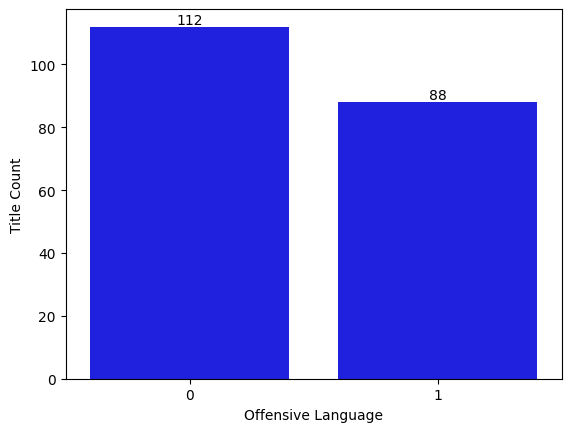

In [13]:
df = corpus_df

categories = [df['Offensive Language'] == 0, df['Offensive Language'] == 1]
counts = [df["Offensive Language"].value_counts()[0], df["Offensive Language"].value_counts()[1]]
        
df["Title Count"] = np.select(categories, counts, default=0)
plot = sns.barplot(x='Offensive Language', y='Title Count', color="blue", data=corpus_df)
plot.bar_label(plot.containers[0])

In [14]:
df = corpus_df
challenge_tags = ['Abortion',
       'Anti-Family', 'Defies Authority', 'Drugs',
       'EDI Content', 'Homophobic or Transphobic', 'Horror or Scary to Minors',
       'Inaccuracy', 'Incest', 'Insensitivity',
       'LGBTQIA', 'Low Literary Value', 'Nudity',
       'Occult/Satanism', 'Offensive Language', 'Pedophilia',
       'Political Viewpoint', 'Pornographic', 'Profanity', 'Racist Content',
       'Rape', 'Religious Viewpoint', 'Sex Education',
       'Sexism', 'Sexually Explicit', 'Suicide','Unsafe or Causes Harm', 'Violence']
counts = []

for tag in challenge_tags:
    counts.append(df[tag].value_counts()[1.0])
    
counts_df = pd.DataFrame({"ChallengeTag": challenge_tags, "Count": counts})
counts_df = counts_df.sort_values('Count')

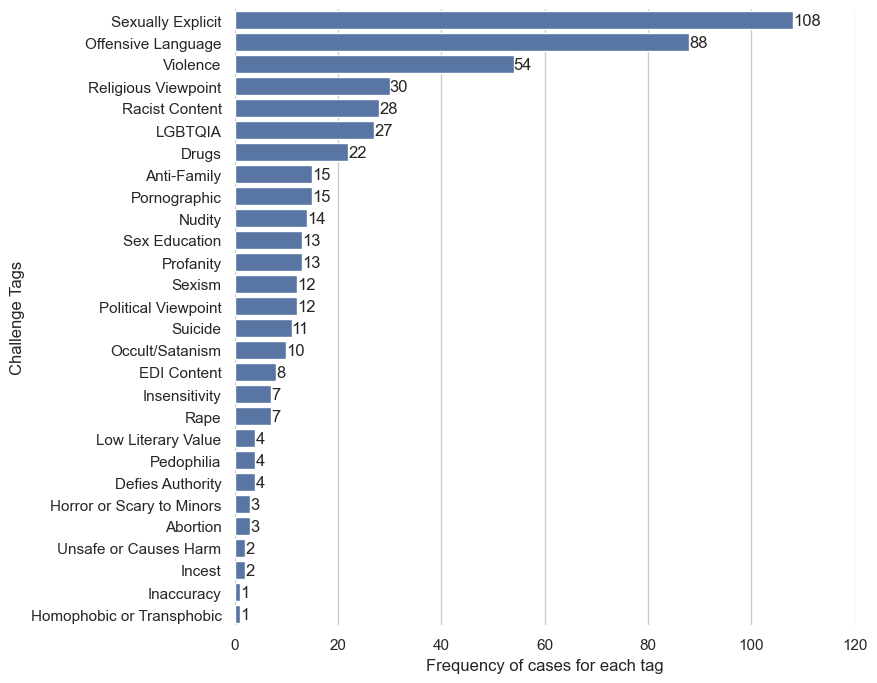

In [15]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(8,8))

palette_color = sns.color_palette('pastel') 
ax = sns.barplot(x=counts, y=challenge_tags, data=counts_df, order = counts_df.sort_values('Count', ascending=False).ChallengeTag)

ax.set(xlim=(0, 120), ylabel="Challenge Tags",
       xlabel="Frequency of cases for each tag")
sns.despine(left=True, bottom=True)

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig('3-5b.png', bbox_inches='tight')
plt.show()